In [1]:
!pip install pygame

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html
[[306 152]
 [302 166]
 [277 179]
 [252 191]
 [230 199]
 [208 211]
 [230 230]
 [262 246]
 [290 258]
 [321 275]
 [ 38  95]
 [ 38 119]
 [ 41 151]
 [ 45 179]
 [ 42 184]
 [ 42 195]
 [ 42 197]
 [ 42 197]
 [ 28 216]
 [ 29 218]
 [ 30 224]
 [ 33 231]
 [ 36 236]
 [ 43 244]
 [ 48 252]
 [ 50 271]
 [ 50 271]
 [ 31 295]
 [ 33 299]
 [ 47 310]
 [ 51 315]
 [ 51 316]
 [ 41 326]
 [ 30 334]
 [ 25 339]
 [ 46 359]
 [ 52 363]]
[[ 45. 179.]
 [ 50. 271.]
 [ 50. 271.]
 [208. 211.]]
[[ 0.01239756 -0.00067378]]


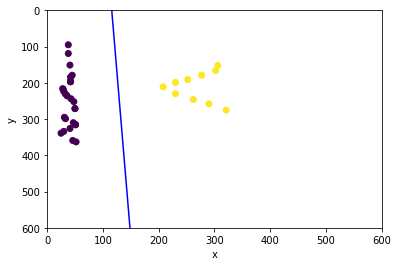

In [ ]:
import pygame
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np

if __name__ == '__main__':
    pygame.init()

    screen = pygame.display.set_mode((400, 400))
    screen.fill((255, 255, 255))
    pygame.display.update()

    coords_x = []
    coords_y = []
    coords = []
    clust = []

    play = True
    while play:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                play = False
            if event.type == pygame.MOUSEBUTTONDOWN:
                if event.button == 1:
                    pygame.draw.circle(screen, (255, 0, 0), event.pos, 10)
                    pygame.display.update()
                    clust.append(0)
                elif event.button == 3:
                    pygame.draw.circle(screen, (0, 255, 0), event.pos, 10)
                    pygame.display.update()
                    clust.append(1)
                coords_x.append(event.pos[0])
                coords_y.append(event.pos[1])
                coords.append(event.pos)
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_r:
                    clf = svm.SVC(C=1.0, kernel='linear')
                    X = np.array(coords)
                    print(X)
                    Y = np.array(clust)
                    clf.fit(X, Y)
                    print(clf.support_vectors_)
                    print(clf.coef_)
                    b = clf.coef0
                    w = clf.coef_[0]
                    a = -w[0] / w[1]
                    xx = np.linspace(0, 1000, 1000)
                    yy = a * xx - (clf.intercept_[0]) / w[1]
                    pygame.draw.line(
                        screen,
                        (0, 0, 255),
                        (xx[0], yy[0]),
                        (xx[-1], yy[-1]),
                        2)
                    pygame.display.update()
                    plt.axis([0.0, 600.0, 600.0, 0.0])
                    plt.plot(xx, yy, c='b')
                    plt.scatter(X[:, 0], X[:, 1], c=Y)
                    plt.xlabel("x")
                    plt.ylabel("y")
                    plt.show()